In [3]:
### Import libraries###

import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

In [14]:
### opening NETCDF dataset MERRA###

file = '/Users/rizvi/Downloads/916DE8BF9943C47C9565953C08A87B52_ferret_listing.nc'
fh = Dataset(file, mode = 'r')

for i in fh.variables:
    print(i)
fh.variables

lon
lat
lat_bnds
plevel
plevel_bnds
Time
ALK


{'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     long_name: longitude
     units: degrees_east
     axis: X
     modulo: 360.0
     point_spacing: even
     standard_name: longitude
 unlimited dimensions: 
 current shape = (40,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     long_name: latitude
     units: degrees_north
     axis: Y
     bounds: lat_bnds
     point_spacing: uneven
     standard_name: latitude
 unlimited dimensions: 
 current shape = (42,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
 float32 lat_bnds(lat, bnds)
 unlimited dimensions: 
 current shape = (42, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'plevel': <class 'netCDF4._netCDF4.Variable'>
 float32 plevel(plevel)
     units: meters
     positive: down
     axis: Z
     bounds: plevel_bnds
     point_spacing: uneven
     standa

In [9]:
### Get variables ###
# Read in 'T2M' 2-meter air temperature variable.
lons = fh.variables['lon'][:] # get longitude variables
lats = fh.variables['lat'][:] # get latitude variables
alk = fh.variables['ALK'][:]
#tmean = fh.variables['T2MMEAN'][:,:,:] - 273.15 # get tmean variable with conversion K for °C 

In [12]:
lons.shape,lats.shape,alk.shape

((40,), (42,), (2, 3, 42, 40))

In [27]:
### meshgrid ###
m=Basemap(projection='cyl',llcrnrlat=5,urcrnrlat=40,llcrnrlon=60,urcrnrlon=110)
lon, lat = np.meshgrid(lons, lats) # create a matrix of coordinates
xi, yi = m(lon, lat)

In [28]:
xi,yi

(masked_array(
   data=[[60.5, 61.5, 62.5, ..., 97.5, 98.5, 99.5],
         [60.5, 61.5, 62.5, ..., 97.5, 98.5, 99.5],
         [60.5, 61.5, 62.5, ..., 97.5, 98.5, 99.5],
         ...,
         [60.5, 61.5, 62.5, ..., 97.5, 98.5, 99.5],
         [60.5, 61.5, 62.5, ..., 97.5, 98.5, 99.5],
         [60.5, 61.5, 62.5, ..., 97.5, 98.5, 99.5]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[ 5.268725,  5.268725,  5.268725, ...,  5.268725,  5.268725,
           5.268725],
         [ 5.84439 ,  5.84439 ,  5.84439 , ...,  5.84439 ,  5.84439 ,
           5.84439 ],
         [ 6.442354,  6.442354,  6.442354, ...,  6.442354,  6.442354,
           6.442354],
         ...,
         [37.5     , 37.5     , 37.5     , ..., 37.5     , 37.5     ,
          37.5     ],
         [38.5     , 38.5     , 38.5     , ..., 38.5     , 38.5     ,
          38.5     ],
         [39.5     , 39.5     , 39.5     , ..., 39.5     , 39.5     ,
          39.5     ]],
   mask=False,
   fil

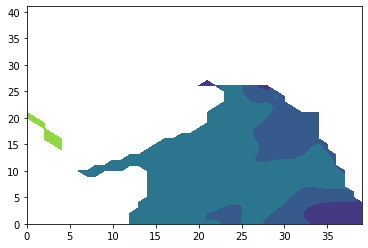

In [38]:
plt.contourf(alk[0,0,:,:])

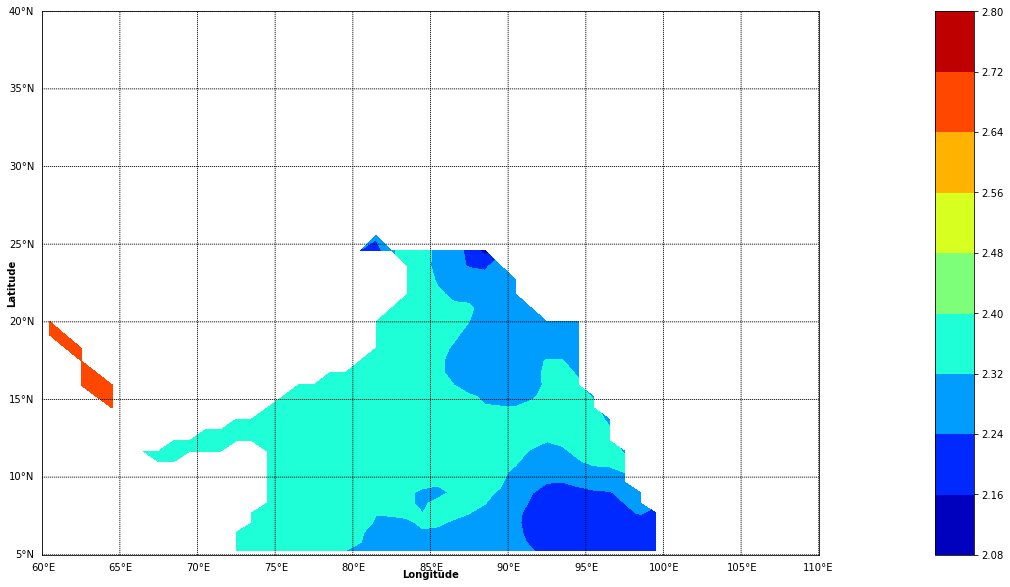

In [35]:
# Plot Data

fig,ax=plt.subplots(figsize=(20,10))
cs = m.contourf(xi,yi,np.squeeze(alk[1,2,:,:]),  cmap='jet') 

### Draw ### 
#m.readshapefile(MTshp, name="Mt") # draw shapefile State of Mato Grosso Brazil
#m.drawcoastlines()
#m.drawcountries()
#m.drawstates()

### Draw Coordinates ###

m.drawparallels(np.arange(-80, 80, 5), labels=[1,0,0,0]) # draw parallels
m.drawmeridians(np.arange(-180, 180, 5), labels=[0,0,0,1]) # draw meridians

# Add Colorbar
cbar = m.colorbar(cs, location='right', pad="15%")
#cbar.set_label('°C') # tmean units

### Labels ###
plt.xlabel('Longitude', fontweight='bold', labelpad=15)
plt.ylabel('Latitude', fontweight='bold', labelpad=25)

### Add Title ###
#plt.title('01-01-2019 Mean Temperature', fontweight='bold', fontsize=12)

# Show the plot
plt.show()